Negotiation Benchmarks
------

How expensive is connection establishment in Bertha?

There are 3 ways of doing negotiation: consensus-based, 1-rtt, and 0-rtt + baseline (no negotiation).
The 0-rtt way should be comparable to baseline (it should in the common case save an RTT, but not help the first case).

In [1]:
import rpy2
import rpy2.robjects.lib.ggplot2 as ggplot2
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
base = importr('base')

# the base of rpy2 plotting is matplotlib, thus we need to declare
# it inline in order to see the plots in the notebook
%matplotlib inline

# we need to activate the automatic conversion for pandas
from rpy2.robjects import pandas2ri
pandas2ri.activate()

# load the needed extension for the %%R cell magic
%load_ext rpy2.ipython

import pandas as pd
import numpy as np

%config IPCompleter.greedy=True

import matplotlib.pylab as plt
plt.rcParams['figure.dpi'] = 200

In [2]:
df = pd.read_csv("~/burrito/nego-bench-666569c/666569c-negbench.data", sep=" ")
df

,Mode,NumReqs,ReqNum,Latency_us
0,0rtt,1000,0,100
1,0rtt,1000,1,135
2,0rtt,1000,2,109
3,0rtt,1000,3,123
4,0rtt,1000,4,96
...,...,...,...,...
3995,Baseline,1000,995,84
3996,Baseline,1000,996,90
3997,Baseline,1000,997,83
3998,Baseline,1000,998,80


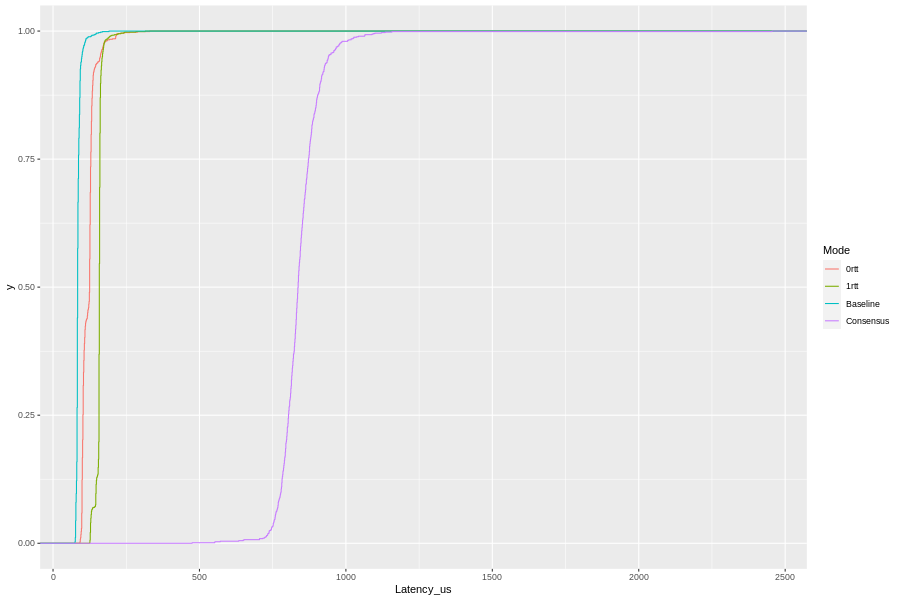

In [3]:
%%R -i df -w 900 -h 600

library(ggplot2)

ggplot(df, aes(x=Latency_us, colour=Mode)) + stat_ecdf()

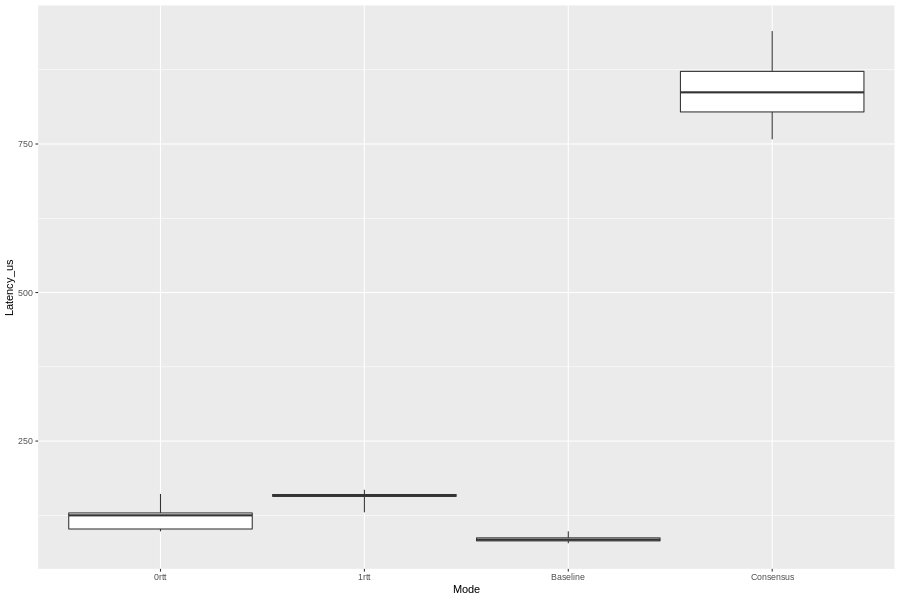

In [4]:
%%R -i df -w 900 -h 600

f <- function(x) {
  r <- quantile(x, probs = c(0.05, 0.25, 0.5, 0.75, 0.95))
  names(r) <- c("ymin", "lower", "middle", "upper", "ymax")
  r
}

ggplot(df, aes(x=Mode, y=Latency_us)) +
    stat_summary(fun.data = f, geom="boxplot")
